In [1]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
</style>
""")

# Filtering
This exercise is about understanding how filters can be applied to modify, or extract specific features from images.

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#pixel_shift1">Task 1: Shifting pixels</a>
            </li>
            <li>
            <a href="#gaussian">Task 2: Gaussian blurring</a>
            </li>
            <li>
            <a href="#template_match">Task 3: Template matching</a>
            </li>
            <li>
            <a href="#sharp">Task 4: Sharpening</a>
            </li>
            <li>
            <a href="#gradient_features0">Task 5: Apply sobel filters</a>
            </li>
            <li>
            <a href="#gradient_features">Task 6: Implementing convolution</a>
            </li>
        </ul>
    </div>
</article>

Run the following cell to import the libraries:


In [2]:
import numpy as np
from skimage import data, color
from scipy.ndimage import convolve
from skimage import feature, transform, io
import matplotlib.pyplot as plt

The same set of example images from the Scikit-Image library used in the tutorial will be used. The code below can be used or modified to load and inspect any of the images.


['astronaut', 'binary_blobs', 'brain', 'brick', 'camera', 'cat', 'cell', 'cells3d', 'checkerboard', 'chelsea', 'clock', 'coffee', 'coins', 'colorwheel', 'data_dir', 'download_all', 'eagle', 'file_hash', 'grass', 'gravel', 'horse', 'hubble_deep_field', 'human_mitosis', 'immunohistochemistry', 'kidney', 'lbp_frontal_face_cascade_filename', 'lfw_subset', 'lily', 'logo', 'microaneurysms', 'moon', 'nickel_solidification', 'page', 'palisades_of_vogt', 'protein_transport', 'retina', 'rocket', 'shepp_logan_phantom', 'skin', 'stereo_motorcycle', 'text', 'vortex']


(np.float64(-0.5), np.float64(383.5), np.float64(302.5), np.float64(-0.5))

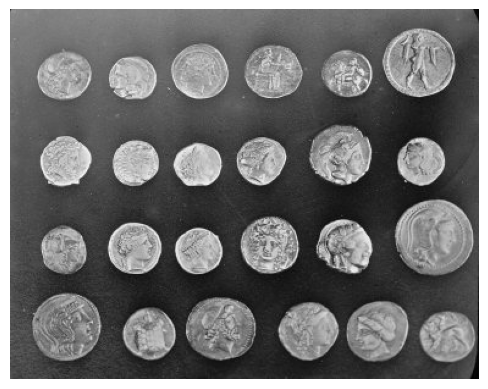

In [3]:
print(data.__all__)
plt.imshow(data.coins(), cmap="gray")
plt.axis(False)


---
**Task 1 (easy): Shifting pixels👩‍💻♾️📽️**
This exercise is about understanding the fundamentals of linear filters to shift pixels in a certain direction. The actual filter may have little practical relevance. 
1. Construct a filter that shifts pixels of an image by $n$ pixels to the right. Create a function with parameter `n`
 that returns a filter that shifts the pixels of an image by `n`
 pixels to the right.
2. Apply the filter (convolution) to one of the example images and show the results. Experiment with different values for `n`
.
3. Create the functions `shift_to_left`
, `shift_to_up`
, and `shift_to_down`
 to shift the input images $n$ pixels to the left, up and down. Use one of the example images to test these functions and evaluate whether the images are correctly shifted. 
4. Modify the filter to not only shift the pixel to the right (or the other directions) but also decreases its brightness.


---

In [4]:
def shift_to_right(n):
    """
    Param n: number of pixels to shift to the right.

    Returns: filter for shifting.
    """
    # write your solution here
    ...


---
**Task 2 (medium): Gaussian blurring👩‍💻📽️**
The following steps will construct a Gaussian filter and apply it to an image:
1. Design a 3x3 filter for Gaussian blurring. Each element of the filter should be filled with values that approximate a Gaussian function.


**Hint**
The filter was covered during the lecture.

2. Display the Gaussian Blur filter using the cell below.
3. Apply the filter to one of the example images and display the original and blurred images side by side.
4. Explain the underlying reasons for the observed effects produced by this filter.
5. Increase the size of the Gaussian blurring filter (shown below). Apply the filter to the selected image and compare the results to the results obtained in the previous steps. Explain the observed effects. 


$$
\begin{equation}
\frac{1}{256}
\begin{bmatrix}
1 & 4 & 6 & 4 & 1 \\
4 & 16 & 24 & 16 & 4 \\
6 & 24 & 36 & 24 & 6 \\
4 & 16 & 24 & 16 & 4 \\
1 & 4 & 6 & 4 & 1 \\
\end{bmatrix}
\end{equation}
$$

---

NameError: name 'gaussian_blur_filter' is not defined

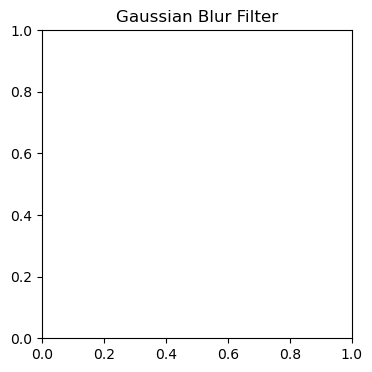

In [5]:
# write your solution here

# Plot the Gaussian Blur Filter
plt.figure(figsize=(4, 4))
plt.title('Gaussian Blur Filter')
plt.imshow(gaussian_blur_filter, cmap='gray')
plt.axis('off')
plt.show()


# Plot the original and the blurred image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Blurred Image')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


---
**Task 3 (medium): Template matching👩‍💻**
The following exercise is about implementing template matching on the sunflower image (`sunflowers.jpg`
) found in the data library for this week's exercises.
1. Run the cell below to load the image, convert it to grayscale and normalize its pixel values. 
2. Define a rectangular region of interest (ROI) within the image. This ROI will serve as the template you want to extract from the image and it should include the flower head of a single sunflower. Extract the template and display it.
3. Implement template matching by using the [`skimage.feature.match_template`
](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_template.html)
 function. The function returns a two-dimensional array (correlation map) that indicate the similarity or correlation between the template and regions of the input image. Display the results.
4. Was the template correctly matched to the original image? Were there any other areas that appeared to be potential matches?
5. (Optional) Repeat the steps above using convolution. What differences and similarities do you observe and why? Does it change if you normalize the filters or the image (or both) prior to convolution?


---

In [0]:
img = io.imread("data/sunflowers.jpg")
img = color.rgb2gray(img).astype(np.float32)/255.

# write your solution here


---
**Task 4 (medium): Sharpening👩‍💻💡**
This task is about creating filters to sharpen the pixels of an input image, making details look clearer than in the original image. The following filters can be used for image sharpening:

$$
K_1=\frac{1}{9}\left[
	\begin{array}{r r r}
		-1 & -1 & -1 \\
		-1 & 17 & -1 \\
		-1 & -1 & -1
	\end{array}
\right],
K_2=\left[
	\begin{array}{r r r}
		-1 & -1 & -1 \\
		-1 &  9 & -1 \\
		-1 & -1 & -1
	\end{array}
\right]
$$
Notice that in this case the filter values sum to one.
1. Why do sharpen filters contain a single positive value at their centers, which are completely surrounded by negative values? Explain why the filters $K_1$ and $K_2$ lead to sharpening.	

2. Define the above filters as Numpy arrays.

3. Use the filters $K_1$ and $K_2$ to sharpen one of the example images from the Scikit-Image library. Show the two filtered images and compare them with the original input image.

4. Implement the sharpening filter shown below and apply it to the selected image. Reflect on the effects of increasing the size of the sharpening filter. 



$$
\frac{1}{8}
\begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & 2 & 2 & 2 & -1 \\
-1 & 2 & 8 & 2 & -1 \\
-1 & 2 & 2 & 2 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}
$$

---

In [0]:
# write your solution here


---
**Task 5 (medium): Apply sobel filters👩‍💻**
The goal in this task is to construct derivative (sobel) filters in the x and y direction, and apply them to the image by using convolution.
The following steps must be completed: 
1. Constuct the two gradient filters defined by the matrices below:


$$
sobel_x=\left[
	\begin{array}{r r r}
		-1 & 0 & 1 \\
		-2 & 0 & 2 \\
		-1 & 0 & 1
	\end{array}
\right],
sobel_y=\left[
	\begin{array}{r r r}
		-1 & -2 & -1 \\
		0 &  0 & 0 \\
		1 & 2 & 1
	\end{array}
\right]
$$
2. Apply the sobel filters using  `convolve`
 from scipy on the sample image. Run the cell below to display the results.


---

In [0]:
fn =  "./data/people01.jpg"
image = plt.imread(fn)

def rgb2gray(rgb):
    """Convert RGB image to grayscale
       Parameters:
        rgb : RGB image
       Returns:
        Grayscale image
    """
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


# Convert the image to grayscale
gray_image = rgb2gray(image)

# Compute the gradients using the Sobel operator
# Define the Sobel operator kernels.

# Step 1: construct sobel filters 
...
# Step 2: convolve the image with the filters
...
# Step 3:  Visualize the original image and gradients with the following subplot template

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray'),
plt.title('Original Grayscale Image')
plt.xticks([]), plt.yticks([])  # Hides the tick values on X and Y axis

plt.subplot(1, 3, 2)
plt.imshow(<place_gradient_x_image>, cmap='gray')
plt.title('Gradient along X-axis')
plt.xticks([]), plt.yticks([])  # Hides the tick values on X and Y axis

plt.subplot(1, 3, 3)
plt.imshow(<place_gradient_y_image>, cmap='gray')
plt.title('Gradient along Y-axis')
plt.xticks([]), plt.yticks([])  # Hides the tick values on X and Y axis
plt.show()


---
**Task 6 (medium): Implementing convolution👩‍💻**
1. For the previous exercise the `convolve`
 method from scipy was used to apply the filters. This task is about implementing convolution. Below is a breakdown of the `convolve2d`
 function used for performing a 2D convolution operation on an image:
    - Reverse the filter, flipping it both vertically and horizontally, to adhere to the convolution's mathematical definition.

    - Output preparation, create an empty array, the same size as the image, to capture the convolution results.

    - Add zero-padding around the image borders to ensure that the kernel properly processes the edges.

    - Convolution process, iterate over each pixel. For each, apply the kernel, multiply its values with the image segment, and sum the results to assign a new value to the pixel.





---

In [0]:
def convolve2d(image, kernel):
    """Perform 2D convolution on an image using a given kernel
       Parameters:
        image : 2D array
        kernel : 2D kernel array
       Returns:
        Convolved 2D array
    """
    # write implementation here...